### Classification Assignment- Logistic Regression

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

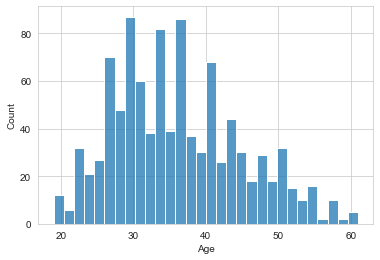

In [6]:
sns.set_style('whitegrid')
sns.histplot(ad_data['Age'], bins=30)

**Create a jointplot showing Area Income versus Age.**

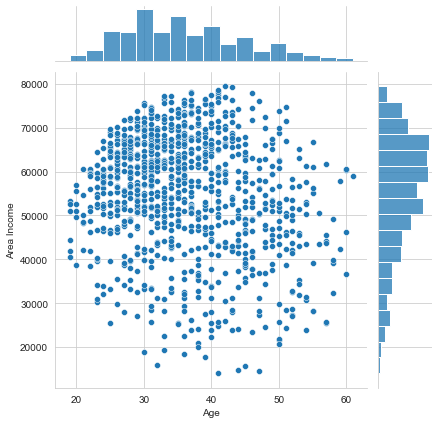

In [7]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

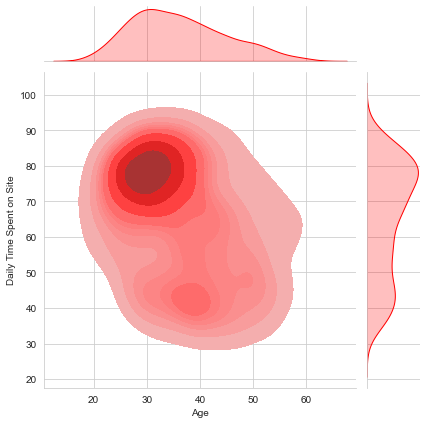

In [8]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde',color='red', fill=True)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

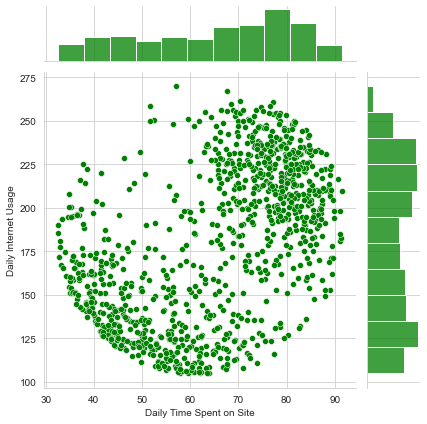

In [9]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, kind='scatter',color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

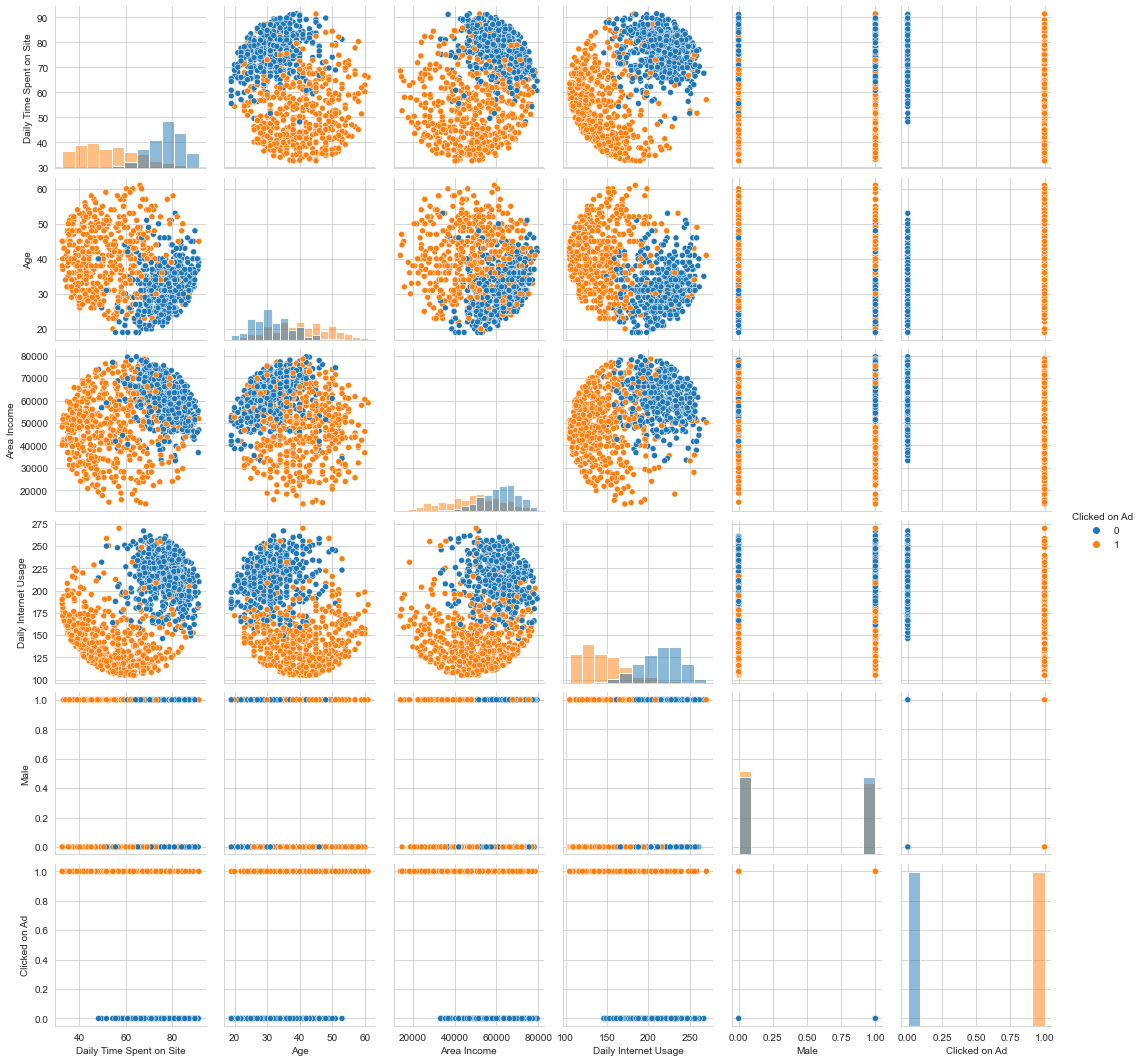

In [10]:
sns.pairplot(ad_data, hue='Clicked on Ad',vars=('Daily Time Spent on Site','Age','Area Income','Daily Internet Usage',
                                                'Male','Clicked on Ad'),kind='scatter', diag_kind='hist')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [11]:
#Importing train-test split function from scikit library
from sklearn.model_selection import train_test_split

In [12]:
x=ad_data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis=1)
y=ad_data['Clicked on Ad']

<AxesSubplot:>

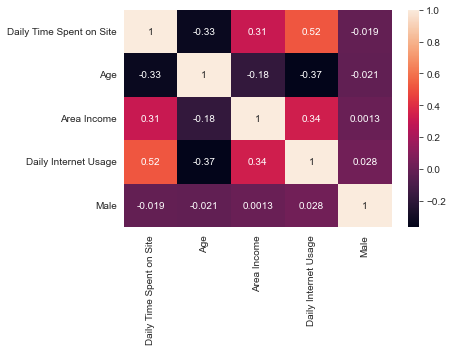

In [13]:
#Checking the correlation among independent variables
sns.heatmap(x.corr(),annot=True)

In [14]:
# Splitting Data into train and Test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 40,stratify=y)

** Train and fit a logistic regression model on the training set.**

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [16]:
log_reg.fit(x_train, y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [17]:
y_pred=log_reg.predict(x_test)

** Create a classification report for the model.**

In [18]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       150
           1       0.94      0.87      0.90       150

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [19]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,141,9
Actual Yes,20,130


# Naive Bayes Classifier

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on with proper resoning!

** Split the data into training set and testing set using train_test_split**

In [20]:
X=ad_data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis=1)
Y=ad_data['Clicked on Ad']

In [21]:
# Splitting Data into train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 40,stratify=y)

As mentioned earlier, Correlation among independent variables are not that high, except the the heighest being 0.52 between 'Daily Time Spent on Site' and 'Daily Internet Usage'. So, using all the continuous variables along with 'Male' for the prediction. 

** Train and fit a Naive Bayes Classifier model on the training set.**

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [23]:
Y_pred=gnb.predict(X_test)

** Create a classification report for the model.**

In [24]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       150
           1       0.98      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [25]:
#print confusion matrix
pd.DataFrame(confusion_matrix(Y_test,Y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,147,3
Actual Yes,4,146


Conclusion: For same dataset the prediction results are much better if we use Naive Bayes algorithm in comarison to Logistic Regression. It is not only in terms of Overall Accuracy but also in terms of Precision, Recall and F1-score

## Great Job!